Importing the libraries used for data preprocessing

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import pickle as pk

Delete the last column of the data because it is just 'NaN' values 

In [2]:
csv_data = pd.read_csv('Data_Entry_2017.csv')
print(csv_data.head(5))

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN 

In [3]:
csv_data = csv_data.iloc[:,:-1]
print(csv_data.head(5))

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                       

Remove all the data with age more than 122 and with multiple deceases (Finding labels)

In [4]:
for i in range(len(csv_data)):
    if ('|' in csv_data['Finding Labels'][i]) or (csv_data['Patient Age'][i]>122):
        csv_data = csv_data.drop(index=i)
csv_data.reset_index(drop=True, inplace=True)

Visualise the occurrences of each finding labels 

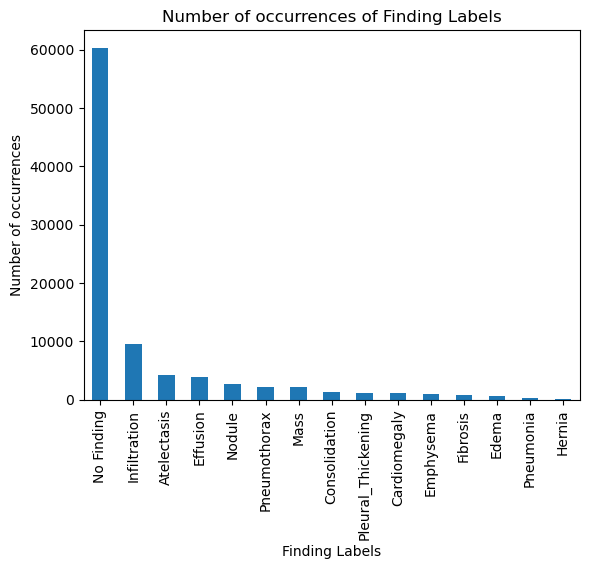

In [5]:
labels_occ = csv_data['Finding Labels'].value_counts()
labels_occ.plot(kind='bar')
plt.title("Number of occurrences of Finding Labels")
plt.xlabel("Finding Labels")
plt.ylabel("Number of occurrences")
plt.show()

As we can see the No finding label is 2 times more than all the others

In [6]:
for i in range(len(csv_data)):
    if 'No Finding' in csv_data['Finding Labels'][i]:
        csv_data = csv_data.drop(index=i)
csv_data.reset_index(drop=True, inplace=True)

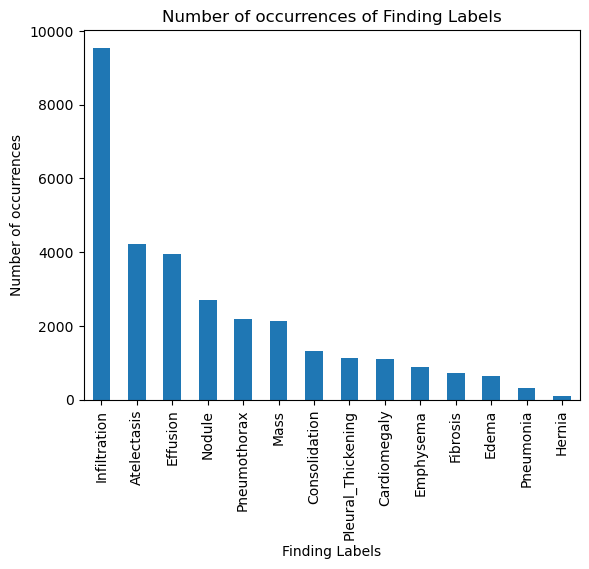

In [7]:
labels_occ = csv_data['Finding Labels'].value_counts()
labels_occ.plot(kind='bar')
plt.title("Number of occurrences of Finding Labels")
plt.xlabel("Finding Labels")
plt.ylabel("Number of occurrences")
plt.show()

Now that the data is  reduced of the number of 'No Finding'. Importing the directories of the images

In [8]:
url = 'images_00'
Dir = []
urls = []
for i in range(1, 13):
    if i >= 10:
        url = 'images_0'
    Dir.append(os.listdir(url + str(i)+'/images'))

And now we get the url to the images 

In [9]:
url = 'images_00'
for i in range(len(Dir)):
    for j in range(len(Dir[i])):
        if i == 9:
            url = 'images_0'
        urls.append(url + str(i+1) + '/images/' + Dir[i][j])

After that we take only the urls that are in csv_data

In [11]:
images = csv_data['Image Index']
j = 0
filter_urls = []
for i in range(len(urls)):
        if images[j] in urls[i]:
            filter_urls.append(urls[i])
            j += 1
        if j>=len(images):
            break

The training and testing data split was provided, so we create variables to put into files for the training 

In [12]:
test_list = pd.read_csv('test_list.txt',header=None , names=['test_list'])
train_list = pd.read_csv('train_val_list.txt',header=None , names=['train_list'])

train_list = np.array(train_list)
test_list = np.array(test_list)

images_used = np.array(csv_data['Image Index'])

test_imgs = test_list[np.isin(test_list,images_used)]
train_imgs = train_list[np.isin(train_list,images_used)]

train_imgs = train_imgs.tolist()
test_imgs = test_imgs.tolist()

In [13]:
Labels = csv_data['Finding Labels']
input_train = []
target_train = []
input_test = []
target_test = []
j = 0
for i in range(len(Labels)):
    if j < len(train_imgs) and train_imgs[j] in filter_urls[i]:
        tmp_img = cv2.imread(filter_urls[i])
        img = cv2.resize(tmp_img, (64, 64))
        input_train.append(img)
        target_train.append(Labels[i])
        j += 1
    else:
        tmp_img = cv2.imread(filter_urls[i])
        img = cv2.resize(tmp_img, (64, 64))
        input_test.append(img)
        target_test.append(Labels[i])


In [16]:
final_data = (input_train, target_train), (input_test, target_test)
with open('data_2.pkl', 'wb') as f:
    pk.dump(final_data, f)